In [310]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [311]:
# Import library
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product


# Preprocessing Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modeling
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [312]:
gdrive_data_url = "https://drive.google.com/file/d/1gXzZTnSiVzNlxsSc7pkn50AtYuWZLZHK/view?usp=sharing"
file_id = gdrive_data_url.split('/')[-2]
data_file='https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(data_file, na_values=['?', ''])

# dropped customer id object 
df = df.drop("customer_id", axis=1)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_account                   8500 non-null   float64
 1   purchases_amount                  8500 non-null   float64
 2   paid_advance                      8500 non-null   float64
 3   full_purchases                    8500 non-null   float64
 4   balance_frequency_update          8500 non-null   float64
 5   installments                      8500 non-null   float64
 6   purchases_frequency               8500 non-null   float64
 7   full_purchases_frequency          8500 non-null   float64
 8   purchases_installments_frequency  8500 non-null   float64
 9   cash_advance_frequency            8500 non-null   float64
 10  nr_cash_advances                  8500 non-null   int64  
 11  nr_purchases                      8500 non-null   int64  
 12  credit

# **Exploratory Data Analysis**

In [314]:
# Check for duplicates
duplicate_rows = df.duplicated()
# Print the number of duplicates
print("Number of duplicates:", duplicate_rows)

Number of duplicates: 0       False
1       False
2       False
3       False
4       False
        ...  
8495    False
8496    False
8497    False
8498    False
8499    False
Length: 8500, dtype: bool


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_account                   8500 non-null   float64
 1   purchases_amount                  8500 non-null   float64
 2   paid_advance                      8500 non-null   float64
 3   full_purchases                    8500 non-null   float64
 4   balance_frequency_update          8500 non-null   float64
 5   installments                      8500 non-null   float64
 6   purchases_frequency               8500 non-null   float64
 7   full_purchases_frequency          8500 non-null   float64
 8   purchases_installments_frequency  8500 non-null   float64
 9   cash_advance_frequency            8500 non-null   float64
 10  nr_cash_advances                  8500 non-null   int64  
 11  nr_purchases                      8500 non-null   int64  
 12  credit

In [316]:
# Inspecting missing values
df.isnull().sum()

balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [317]:
df.describe()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8499.000000,8500.000000,8500.000000,8202.000000,8500.000000
mean,1565.941403,999.561312,973.508540,588.165365,0.876272,411.708492,0.489383,0.201940,0.363796,0.135288,3.253647,14.677059,4485.848704,11.516118,1721.250989,865.594683,0.152587
std,2090.513302,2154.189460,2078.539061,1669.466184,0.237517,910.142440,0.401075,0.297756,0.397162,0.200892,6.854883,25.001561,3629.804040,1.339121,2893.200899,2389.297977,0.291505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,6.000000,0.000000,0.019163,0.000000
25%,126.318369,39.000000,0.000000,0.000000,0.875000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,12.000000,381.893717,168.712104,0.000000
50%,869.046468,360.000000,0.000000,37.400000,1.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,12.000000,851.146952,310.399040,0.000000
75%,2053.674410,1105.897500,1113.726110,570.410000,1.000000,466.725000,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,12.000000,1897.014052,826.426929,0.142857
max,19043.138560,49039.570000,47137.211760,40761.250000,1.000000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,12.000000,50721.483360,76406.207520,1.000000


# **Visualize the Skewed Data Distribution in Raw Dataset**

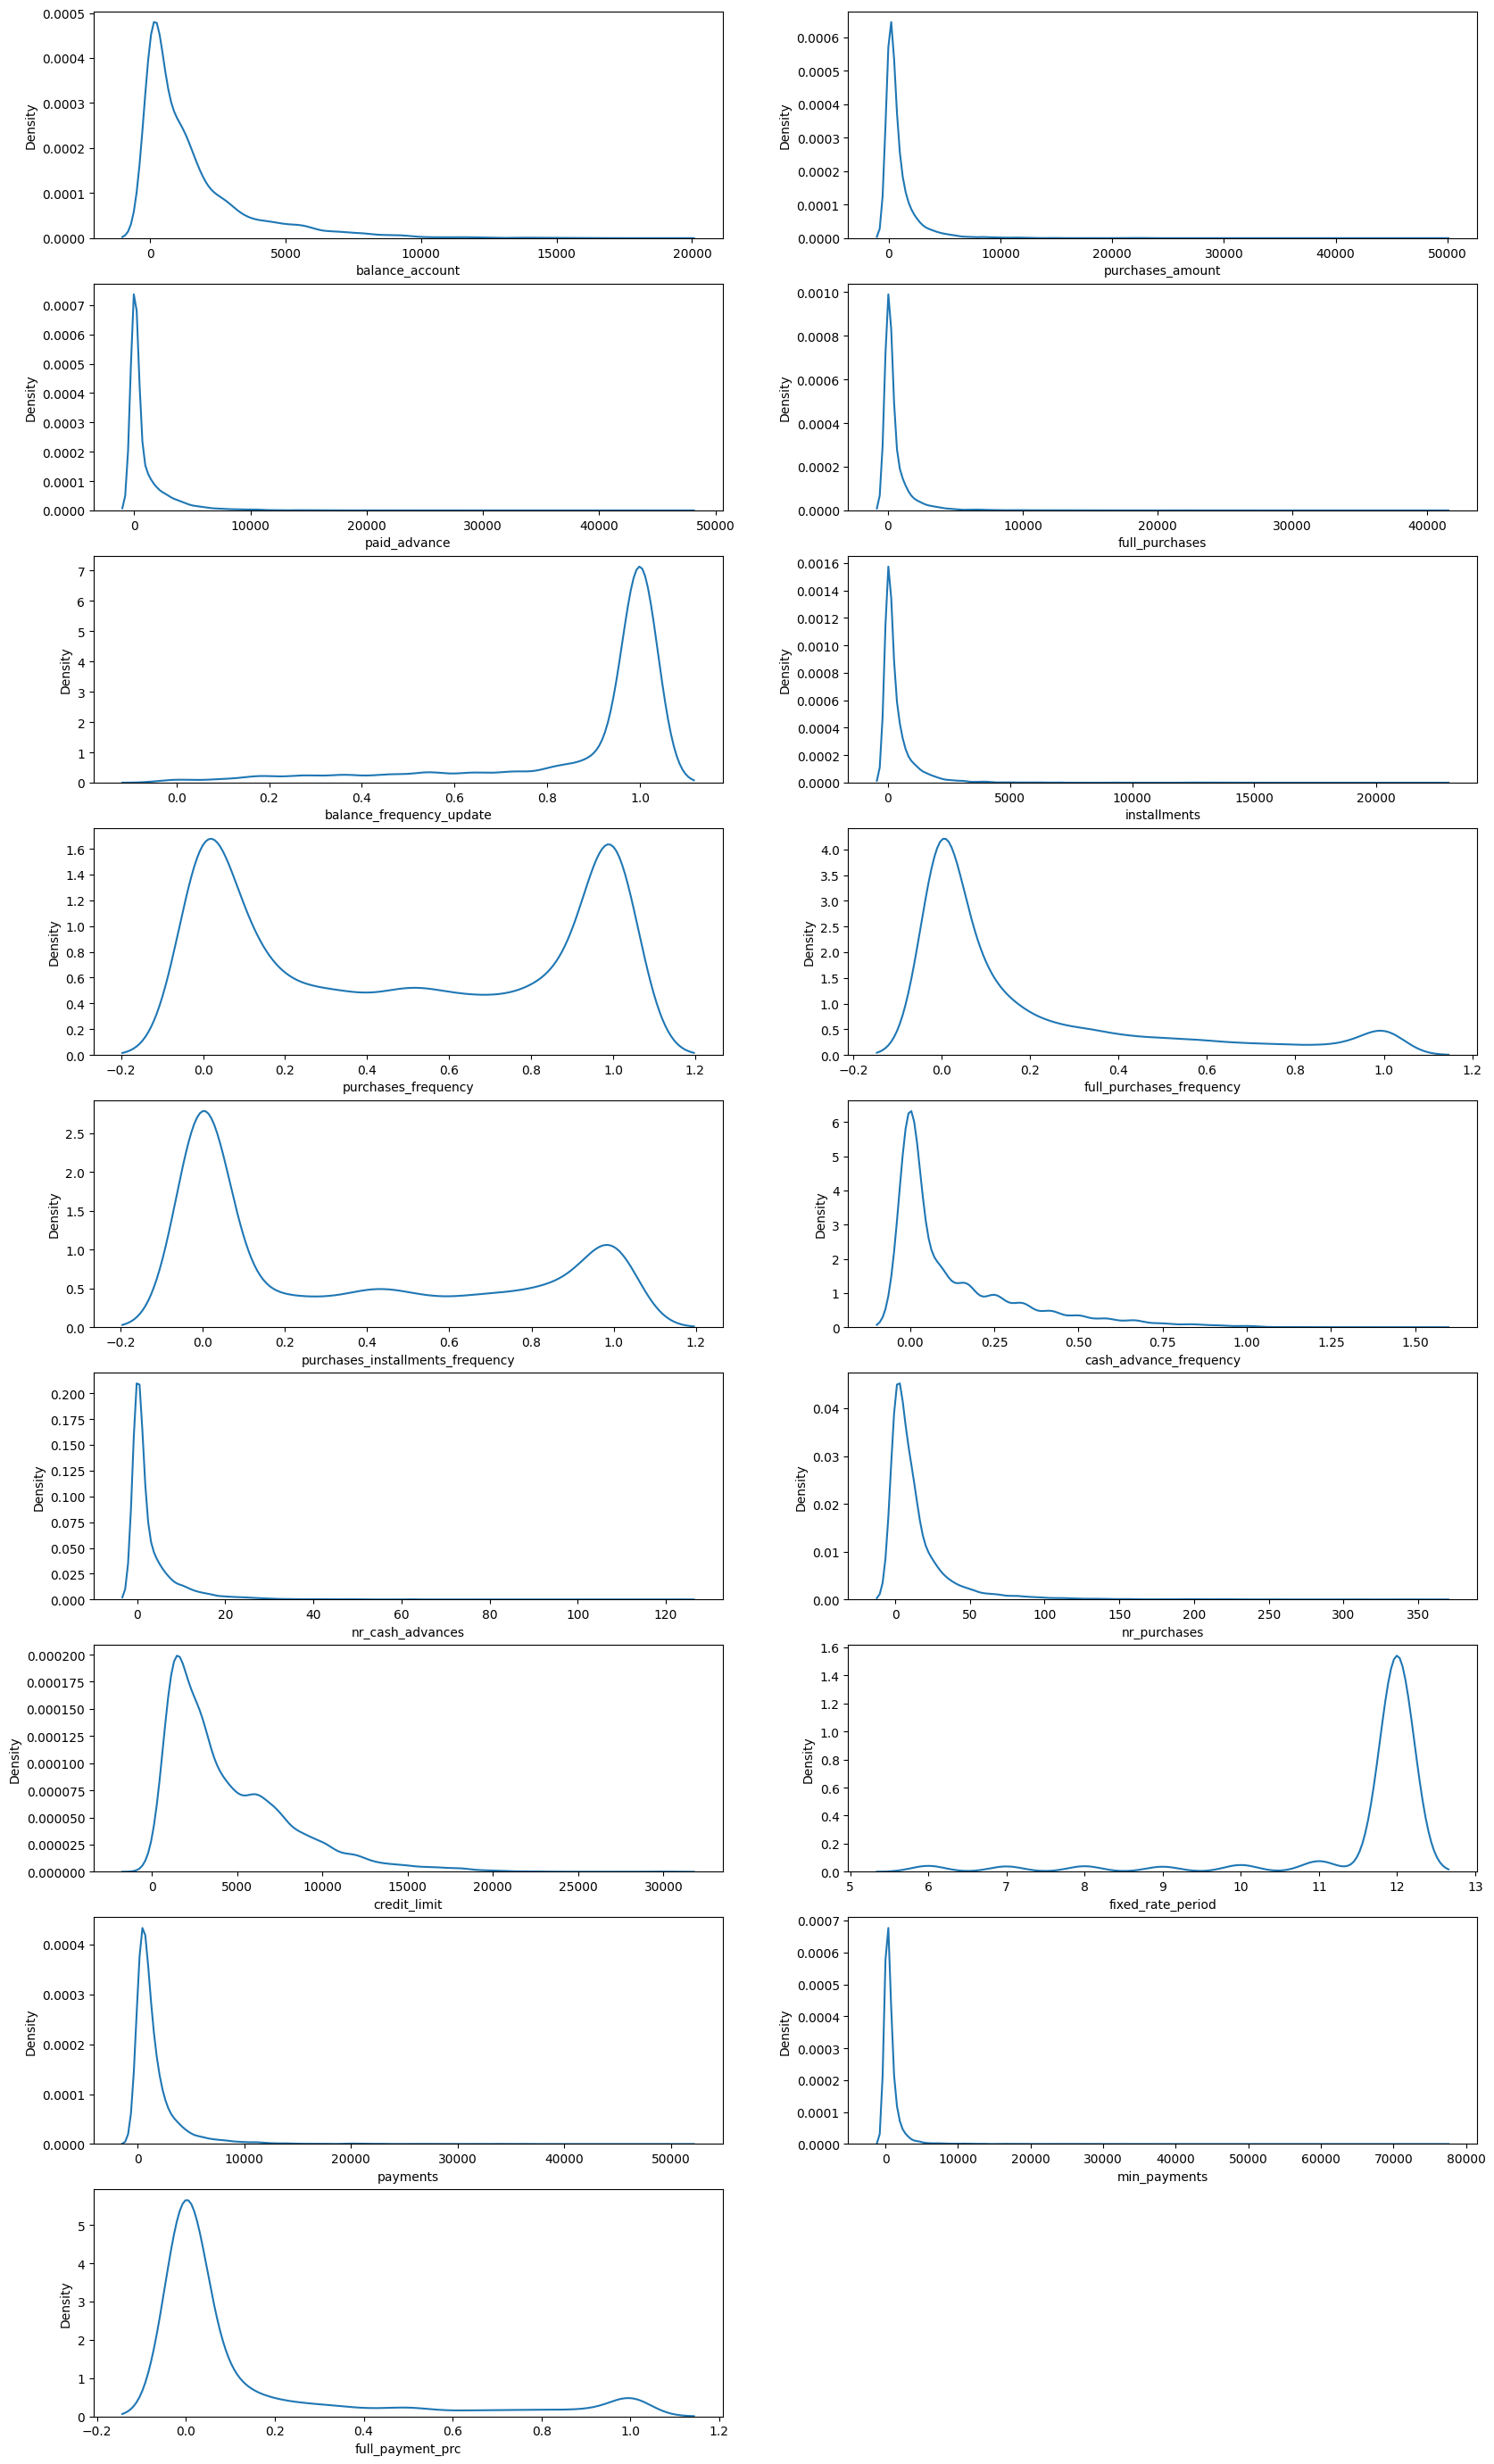

In [318]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
        
plt.show()

# **Correlation Between Numerical Features**

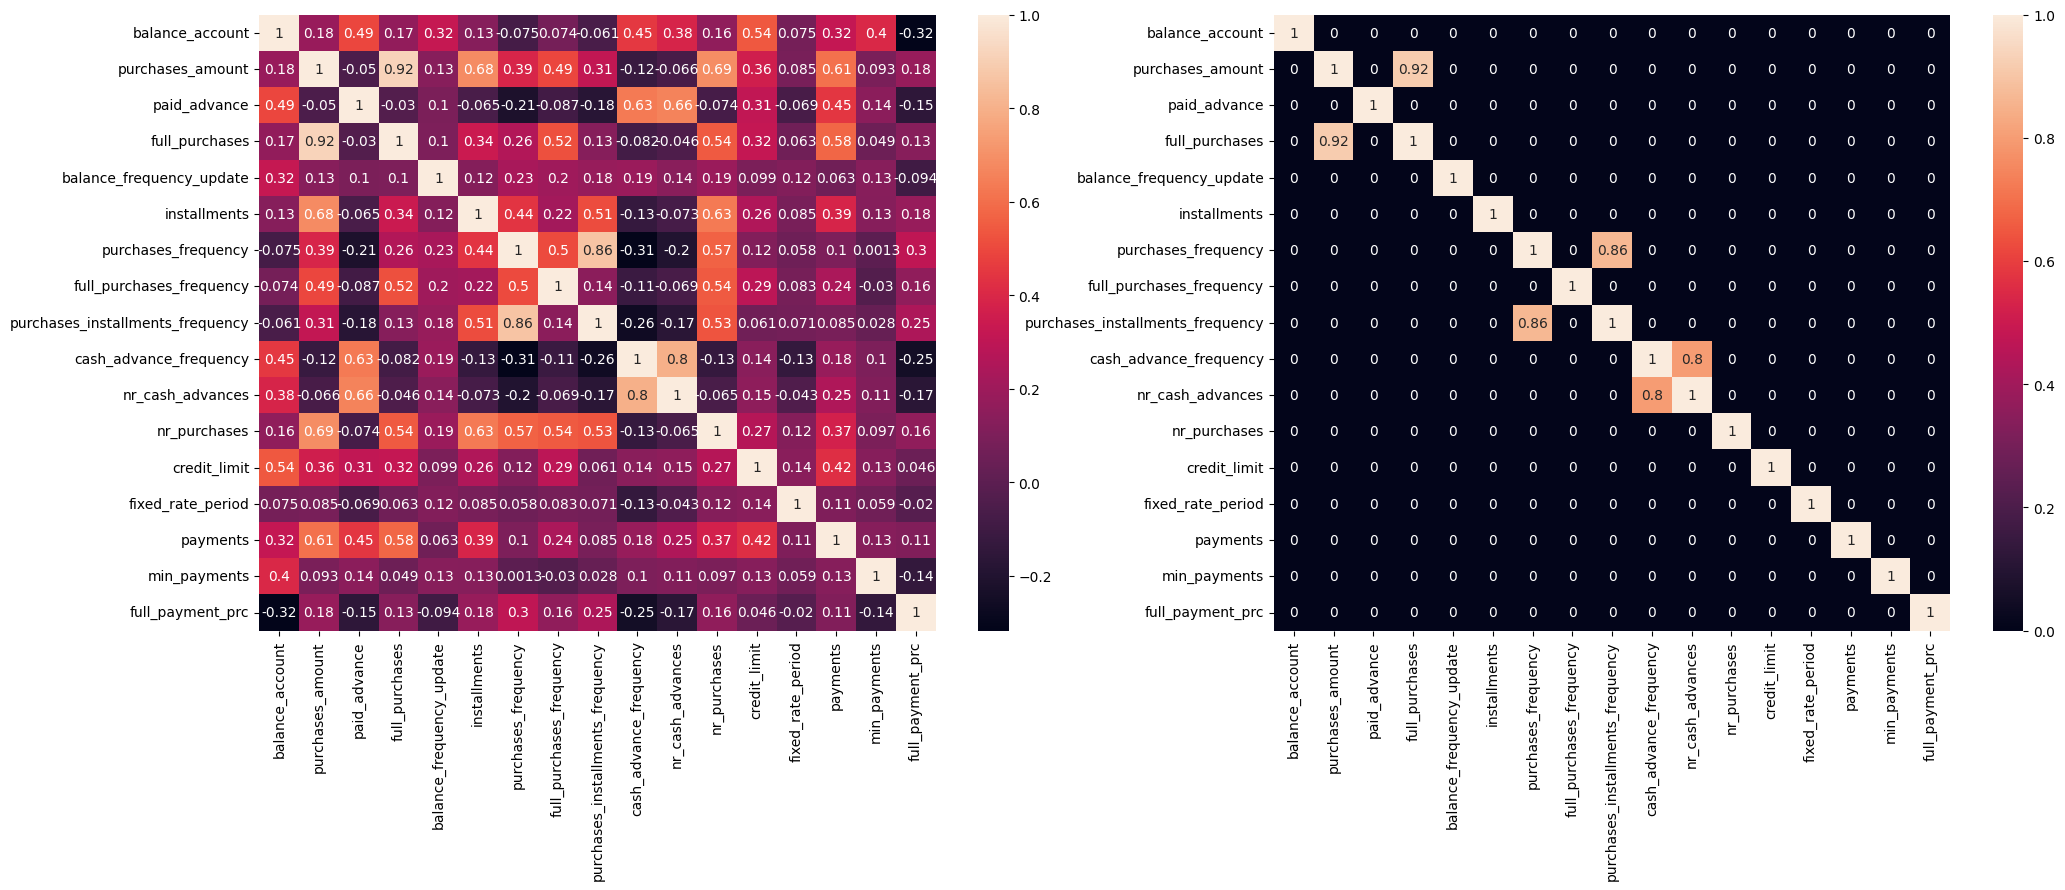

In [319]:
r = df.corr()
r[abs(r) <= 0.75] = 0
figs, axs = plt.subplots(1, 2, figsize = (24,8))
# plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, ax = axs[0]);
sns.heatmap(r, annot=True, ax = axs[1]);

In [320]:
def find_highly_correlated_features(df, threshold=0.75):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Find the features that have correlation greater than the threshold
    high_corr_features = corr_matrix[corr_matrix > threshold]
    
    # Create a mask to exclude self-correlations and lower triangle of the correlation matrix
    mask = pd.DataFrame(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool), columns=df.columns, index=df.columns)
    
    # Apply the mask to exclude self-correlations and lower triangle
    high_corr_features = high_corr_features.where(mask)
    
    # Get the column names of highly correlated features
    correlated_features = high_corr_features.stack().dropna().reset_index()[['level_0', 'level_1']]
    
    # Remove duplicate entries
    correlated_features = correlated_features[correlated_features['level_0'] != correlated_features['level_1']]
    
    # Return the correlated feature pairs
    return correlated_features

# Example usage:
correlated_features = find_highly_correlated_features(df, threshold=0.75)
correlated_features

,level_0,level_1
0,purchases_amount,full_purchases
1,purchases_frequency,purchases_installments_frequency
2,cash_advance_frequency,nr_cash_advances


In [321]:
corr_list = []
for i in range(correlated_features.shape[0]):
  corr_list.append(correlated_features.level_0.loc[i])

corr_list

['purchases_amount', 'purchases_frequency', 'cash_advance_frequency']

In [322]:
df.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc'],
      dtype='object')

In [323]:
df = df.drop(columns = corr_list, axis = 1)

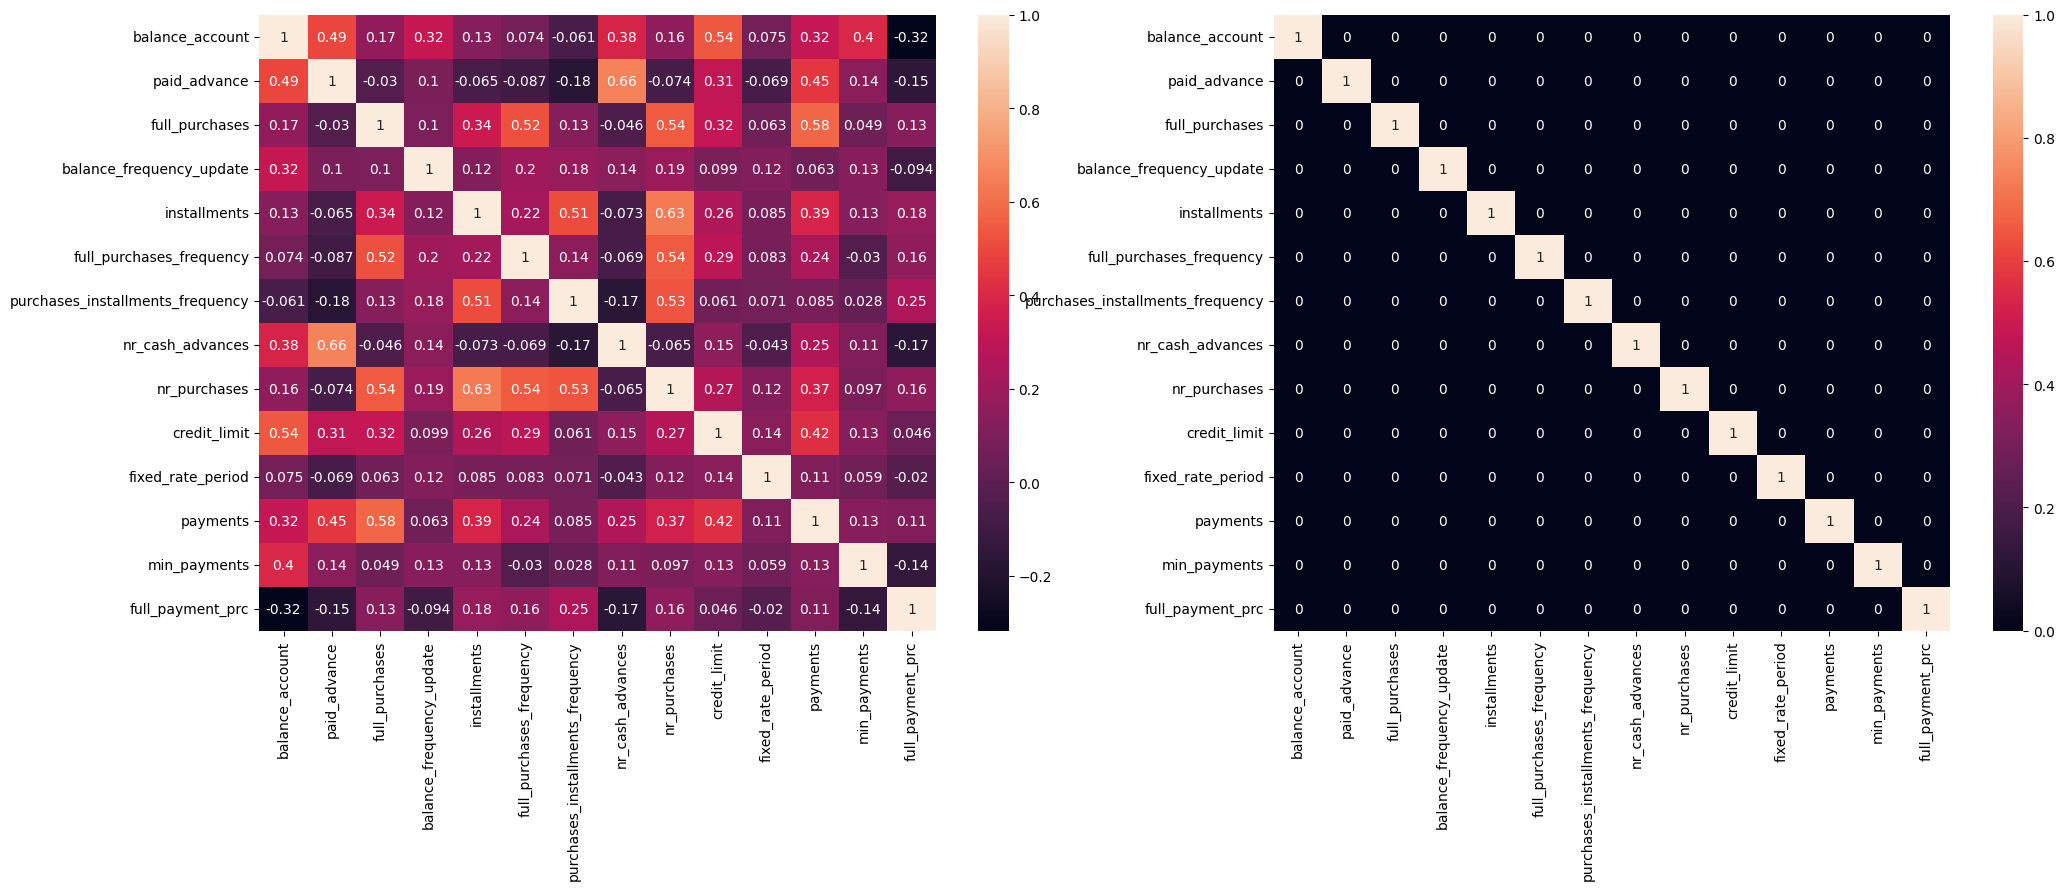

In [324]:
r = df.corr()
r[abs(r) <= 0.75] = 0
figs, axs = plt.subplots(1, 2, figsize = (24,8))
# plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, ax = axs[0]);
sns.heatmap(r, annot=True, ax = axs[1]);

In [325]:
# Inspecting missing values
df.isnull().sum(), "", df.shape

(balance_account                       0
 paid_advance                          0
 full_purchases                        0
 balance_frequency_update              0
 installments                          0
 full_purchases_frequency              0
 purchases_installments_frequency      0
 nr_cash_advances                      0
 nr_purchases                          0
 credit_limit                          1
 fixed_rate_period                     0
 payments                              0
 min_payments                        298
 full_payment_prc                      0
 dtype: int64,
 '',
 (8500, 14))

In [326]:
import math

df = df[df.credit_limit.notna()]                # drop na value of credit_limit

min_payments_median = df.min_payments.median()  #replace na values of min_payments with median
df["min_payments"] = df.min_payments.apply(lambda x : min_payments_median if math.isnan(x) else x)
df.isnull().sum()

balance_account                     0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
full_purchases_frequency            0
purchases_installments_frequency    0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

In [327]:
df.head()

,balance_account,paid_advance,full_purchases,balance_frequency_update,installments,full_purchases_frequency,purchases_installments_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,0.000000,0.00,0.909091,107.6,0.000000,0.818182,0,10,1000.0,11,89.868853,89.711672,0.428571
1,52.666422,0.000000,0.00,1.000000,150.3,0.000000,0.833333,0,6,1000.0,6,54.722514,82.955180,0.000000
2,1360.795674,462.861443,0.00,1.000000,0.0,0.000000,0.000000,6,0,1500.0,11,303.031979,443.781316,0.000000
3,2021.641161,0.000000,363.18,1.000000,0.0,1.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,22.322374,1162.045833,95.00,0.363636,0.0,0.083333,0.000000,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [328]:
for column in df.columns:
  q25 = np.quantile(df[column], .25)
  median = np.quantile(df[column], .5)
  q75 = np.quantile(df[column], .75)
  IQR = q75-q25

  LW = median - 1.5 * IQR
  UW = median + 1.5 * IQR

  df_filtered = df[df[column] <= UW]
  df_filtered = df_filtered[df_filtered[column] >= LW]

  print(LW, UW)

df = df_filtered

-2022.1725112500003 3760.3554952500003
-1670.6604367500001 1670.6604367500001
-818.865 893.865
0.8229167499999999 1.1770832500000001
-611.095 789.095
-0.3452379999999999 0.5119039999999999
-0.958333 1.291667
-6.0 6.0
-17.0 31.0
-4500.0 10500.0
12.0 12.0
-1421.12744375 3123.80425375
-614.887915 1235.797331
-0.21428549999999985 0.21428549999999985


In [329]:
df.head()

,balance_account,paid_advance,full_purchases,balance_frequency_update,installments,full_purchases_frequency,purchases_installments_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
1,52.666422,0.000000,0.00,1.000000,150.3,0.000000,0.833333,0,6,1000.0,6,54.722514,82.955180,0.0
2,1360.795674,462.861443,0.00,1.000000,0.0,0.000000,0.000000,6,0,1500.0,11,303.031979,443.781316,0.0
3,2021.641161,0.000000,363.18,1.000000,0.0,1.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.0
4,22.322374,1162.045833,95.00,0.363636,0.0,0.083333,0.000000,3,1,2500.0,12,4094.261427,40.142262,0.0
5,9266.080540,4383.296268,0.00,1.000000,100.0,0.000000,0.250000,3,4,17500.0,12,2444.123547,2603.406476,0.0


### Clustering

In [330]:
df.isna().sum()

balance_account                     0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
full_purchases_frequency            0
purchases_installments_frequency    0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

In [331]:
# Explore no of clusters

df.fillna(df.mean(), inplace=True)

cluster_errors = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=42, verbose=0))])
    kmeans_pipeline.fit(df)
    #kmeans_pipeline.predict(df)
    wcsse = kmeans_pipeline.named_steps["cluster"].inertia_
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

K =  2 	WCSS Err. =  79722.06040435107
K =  3 	WCSS Err. =  70809.16019637026
K =  4 	WCSS Err. =  65002.9400649859
K =  5 	WCSS Err. =  60191.392563614456
K =  6 	WCSS Err. =  56347.082008375444
K =  7 	WCSS Err. =  51834.75493054344
K =  8 	WCSS Err. =  49157.378689985984
K =  9 	WCSS Err. =  45709.8296305206
K =  10 	WCSS Err. =  42605.06246424178


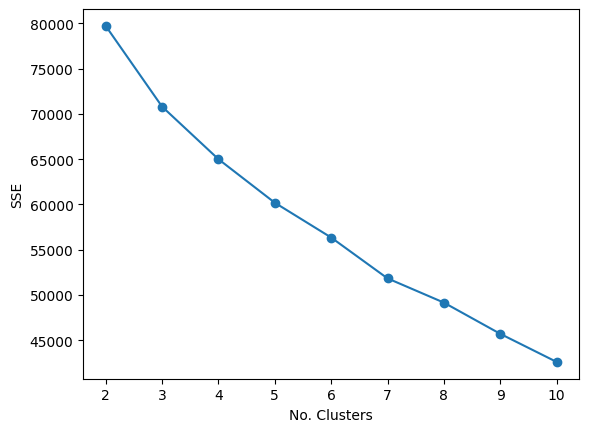

In [332]:
plt.plot(range(2, 11), cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4672
For n_clusters = 3 The average silhouette_score is : 0.3995
For n_clusters = 4 The average silhouette_score is : 0.0053
For n_clusters = 5 The average silhouette_score is : -0.0033
For n_clusters = 6 The average silhouette_score is : -0.0357
For n_clusters = 7 The average silhouette_score is : -0.0376
For n_clusters = 8 The average silhouette_score is : -0.0406
For n_clusters = 9 The average silhouette_score is : -0.0292
For n_clusters = 10 The average silhouette_score is : -0.0075


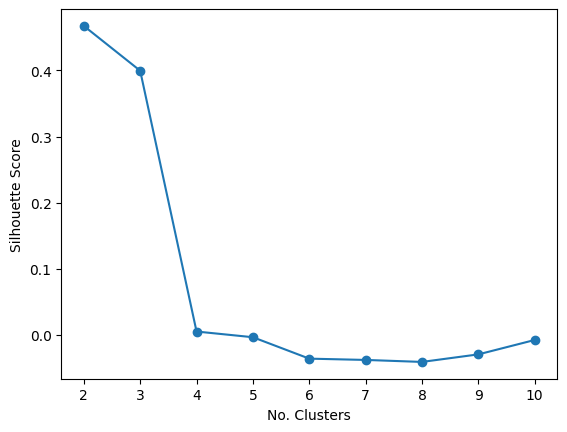

In [333]:
silhouette_s = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters))])
    
    cluster_labels = kmeans_pipeline.fit_predict(df)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df, cluster_labels))
    
plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [334]:
clusternumber = 4

kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=clusternumber, random_state=42, verbose=0))])

kmeans_pipeline.fit(df)
clusters = kmeans_pipeline.fit_predict(df)
df['cluster'] = clusters
df.head()

,balance_account,paid_advance,full_purchases,balance_frequency_update,installments,...,fixed_rate_period,payments,min_payments,full_payment_prc,cluster
1,52.666422,0.000000,0.00,1.000000,150.3,...,6,54.722514,82.955180,0.0,1
2,1360.795674,462.861443,0.00,1.000000,0.0,...,11,303.031979,443.781316,0.0,0
3,2021.641161,0.000000,363.18,1.000000,0.0,...,12,704.240770,795.859808,0.0,0
4,22.322374,1162.045833,95.00,0.363636,0.0,...,12,4094.261427,40.142262,0.0,1
5,9266.080540,4383.296268,0.00,1.000000,100.0,...,12,2444.123547,2603.406476,0.0,3


In [335]:
df.cluster.value_counts()

0    3934
1    1219
3     904
2     663
Name: cluster, dtype: int64

In [336]:
axis_labels = {"customer_id" : "id of the credit card holder",
    "balance_account" : "Wealth: balance amount left in the account to make purchases at the end of the 6-month period",
    "purchases_amount" : "Frequent buyers: amount of purchases made from account",
    "paid_advance" : 'Cash payment: number of transactions made with “Cash in Advance” method',
    'full_purchases' : 'Big purchases: maximum purchase amount done in full payment',
    'balance_frequency_update' : "Much cashflow: how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)",
    'installments':'Installments(Raten): amount of purchases done in installments',
    'purchases_frequency' : 'Frequent buyers: how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)',
    'full_purchases_frequency' : 'Full payment: how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)',
    'purchases_installments_frequency' : 'Frequency of installment: how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)',
    'cash_advance_frequency' : 'Frequency cas in advance: how frequently the cash in advance being paid',
    'nr_cash_advances' : 'cash in advance given by the user',
    'nr_purchases' : 'number of purchase transactions made',
    'credit_limit' : 'Credit limit: limit of credit card for user',
    'fixed_rate_period' : 'duration of fixed interest rate of credit card service for user (in months)',
    'payments' : 'amount of payment done by user',
    'min_payments' : 'minimum amount of payments made by user',
    'full_payment_prc' : 'percent of full payment paid by user' 
    }

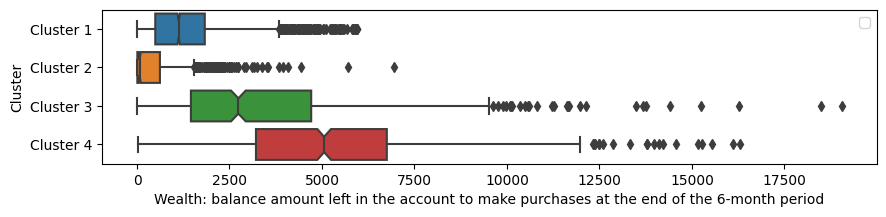

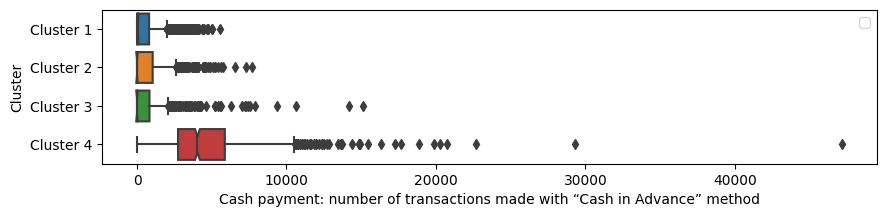

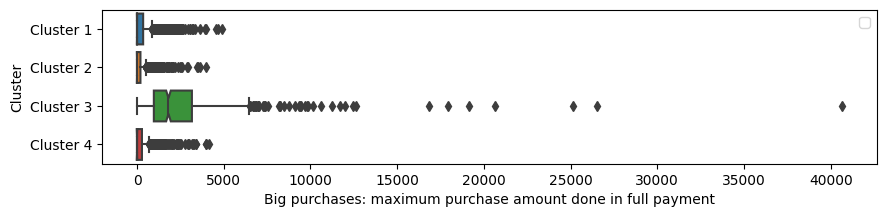

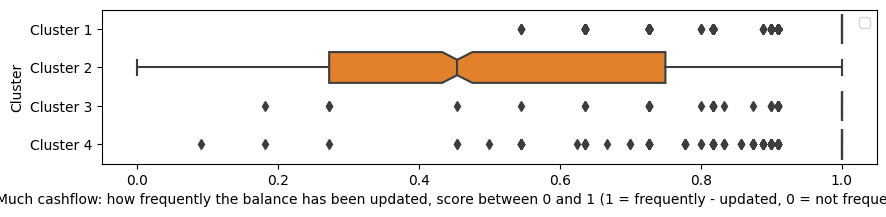

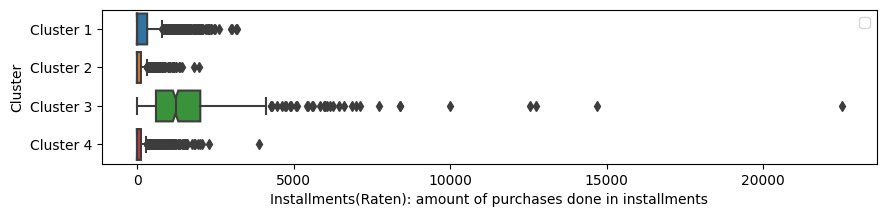

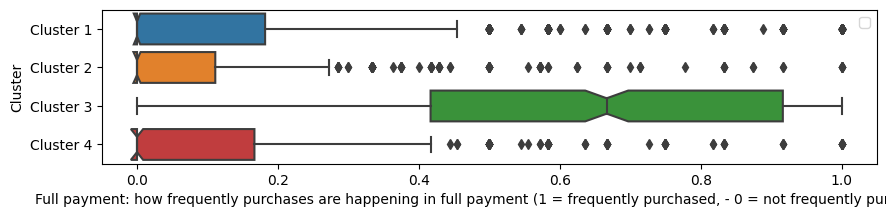

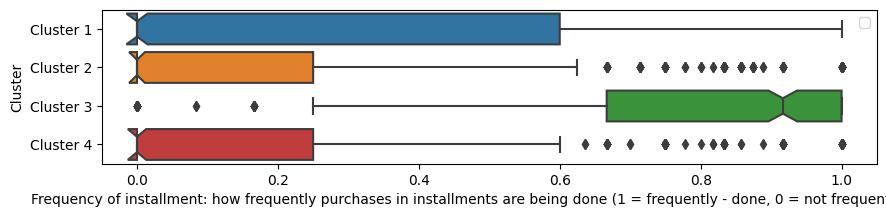

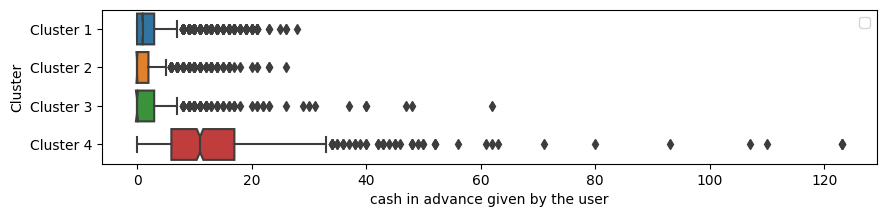

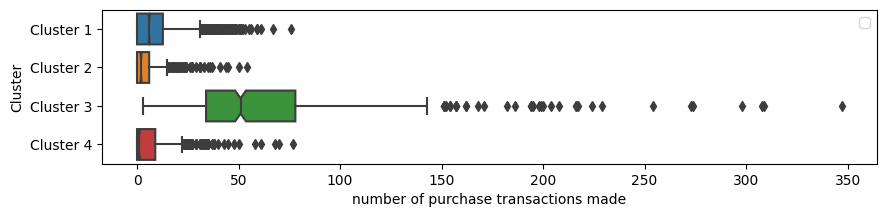

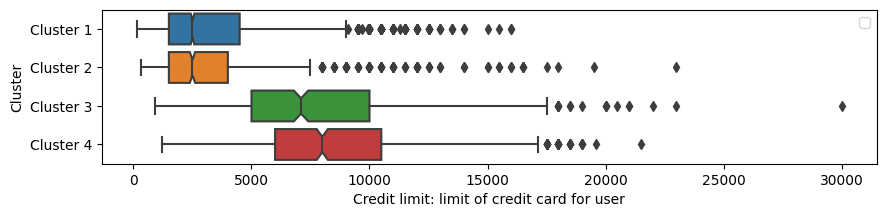

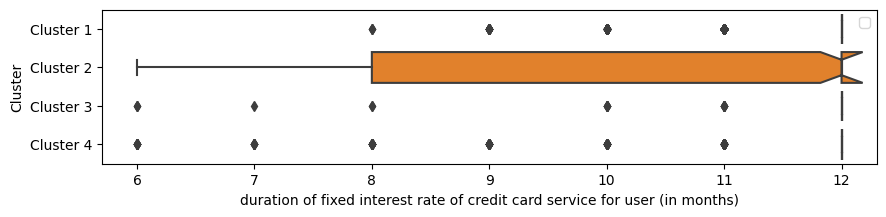

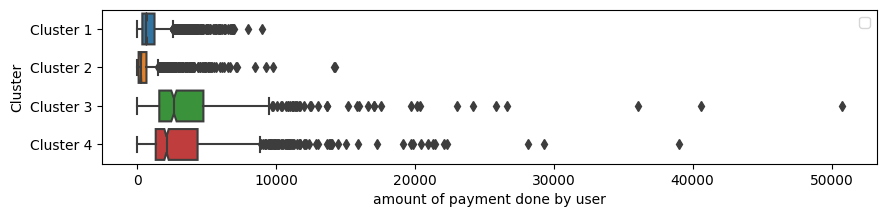

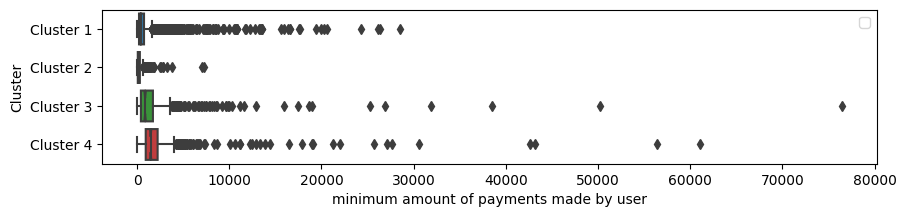

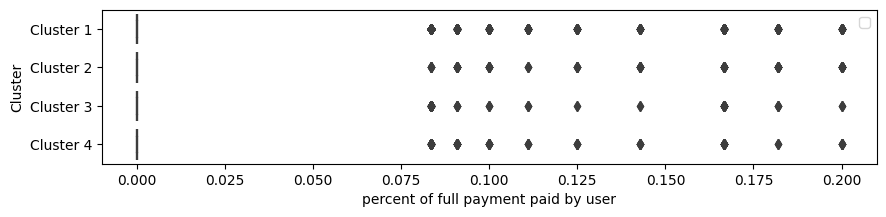

In [337]:
features = list(df.columns)

for feature in features[:-1]:
  fig1, ax1 = plt.subplots(figsize = (10,2))
  boxplot_data = []
  labels = []
  for cluster_i in range (0, clusternumber):
    cluster = df[df.cluster == cluster_i]
    boxplot_data.append(cluster[feature])
    labels.append(f'Cluster {cluster_i+1}')
  sns.boxplot(ax = ax1, data = boxplot_data, orient = "h", notch = True);
  ax1.set_yticklabels(labels)
  ax1.set_xlabel(axis_labels[feature])
  ax1.set_ylabel("Cluster")
  ax1.legend();
#ax2.legend()

In [338]:
correlated_features

,level_0,level_1
0,purchases_amount,full_purchases
1,purchases_frequency,purchases_installments_frequency
2,cash_advance_frequency,nr_cash_advances


In [339]:
allfeaturecombinations = []
for i in df.columns:
  for j in df.columns:
    if (i != j) and (i != "cluster") and (j!= "cluster"):
      featurecombinations.append([i,j])

allfeaturecombinations

[]

In [340]:
features = df.columns
features

Index(['balance_account', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'full_purchases_frequency',
       'purchases_installments_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc', 'cluster'],
      dtype='object')

In [341]:
featurecombinations = [
    ['balance_account', 'paid_advance'],
    ['balance_account', 'full_purchases']
]

In [342]:
for featurecombination in allfeaturecombinations[:5]: 
  fig1, ax1 = plt.subplots()
  for cluster_i in range (0, clusternumber+1):
    cluster = df[df.cluster == cluster_i]
    sns.scatterplot(ax = ax1, data = df, x = cluster[featurecombination[0]], y = cluster[featurecombination[1]], color = sns.color_palette()[cluster_i], alpha = 0.5, s = 20, label=f'Cluster {cluster_i}')
  # sns.scatterplot(ax = ax2, data = df2, x = prefpos["Finishing"], y = prefpos["Volleys"], color = sns.color_palette()[i], alpha = 0.5, s = 20,label=f'Preferred Positions {toppos[i]}')

  ax1.legend()
#ax2.legend()

In [343]:
#scatterplot instead of boxplot

'''features = list(df.columns)

for feature in features:
  fig1, ax1 = plt.subplots(figsize = (10,1))
  for cluster_i in range (0, clusternumber+1):
    cluster = df[df.cluster == cluster_i]
    sns.scatterplot(ax = ax1, data = df, x = cluster[feature], y = cluster.cluster, color = sns.color_palette()[cluster_i], alpha = 0.5, s = 20, label=f'Cluster {cluster_i}')
  # sns.scatterplot(ax = ax2, data = df2, x = prefpos["Finishing"], y = prefpos["Volleys"], color = sns.color_palette()[i], alpha = 0.5, s = 20,label=f'Preferred Positions {toppos[i]}')
  ax1.legend()
#ax2.legend()'''

'features = list(df.columns)\n\nfor feature in features:\n  fig1, ax1 = plt.subplots(figsize = (10,1))\n  for cluster_i in range (0, clusternumber+1):\n    cluster = df[df.cluster == cluster_i]\n    sns.scatterplot(ax = ax1, data = df, x = cluster[feature], y = cluster.cluster, color = sns.color_palette()[cluster_i], alpha = 0.5, s = 20, label=f\'Cluster {cluster_i}\')\n  # sns.scatterplot(ax = ax2, data = df2, x = prefpos["Finishing"], y = prefpos["Volleys"], color = sns.color_palette()[i], alpha = 0.5, s = 20,label=f\'Preferred Positions {toppos[i]}\')\n  ax1.legend()\n#ax2.legend()'

In [344]:
df.head()

,balance_account,paid_advance,full_purchases,balance_frequency_update,installments,full_purchases_frequency,purchases_installments_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,cluster
1,52.666422,0.000000,0.00,1.000000,150.3,0.000000,0.833333,0,6,1000.0,6,54.722514,82.955180,0.0,1
2,1360.795674,462.861443,0.00,1.000000,0.0,0.000000,0.000000,6,0,1500.0,11,303.031979,443.781316,0.0,0
3,2021.641161,0.000000,363.18,1.000000,0.0,1.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.0,0
4,22.322374,1162.045833,95.00,0.363636,0.0,0.083333,0.000000,3,1,2500.0,12,4094.261427,40.142262,0.0,1
5,9266.080540,4383.296268,0.00,1.000000,100.0,0.000000,0.250000,3,4,17500.0,12,2444.123547,2603.406476,0.0,3


In [345]:
df.head()

,balance_account,paid_advance,full_purchases,balance_frequency_update,installments,full_purchases_frequency,purchases_installments_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,cluster
1,52.666422,0.000000,0.00,1.000000,150.3,0.000000,0.833333,0,6,1000.0,6,54.722514,82.955180,0.0,1
2,1360.795674,462.861443,0.00,1.000000,0.0,0.000000,0.000000,6,0,1500.0,11,303.031979,443.781316,0.0,0
3,2021.641161,0.000000,363.18,1.000000,0.0,1.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.0,0
4,22.322374,1162.045833,95.00,0.363636,0.0,0.083333,0.000000,3,1,2500.0,12,4094.261427,40.142262,0.0,1
5,9266.080540,4383.296268,0.00,1.000000,100.0,0.000000,0.250000,3,4,17500.0,12,2444.123547,2603.406476,0.0,3


In [346]:
from sklearn.preprocessing import MinMaxScaler

cluster_nos = range(0, clusternumber)
medians = pd.DataFrame(data=cluster_nos, columns=["Cluster"])

for column in list(df.columns):
    medians_per_cluster = df.groupby(by="cluster")[column].median()
    medians[column] = medians_per_cluster

# Drop the 'cluster' column
#medians = medians.drop(["Cluster","balance_frequency_update","cluster" ,"full_purchases_frequency","nr_purchases", "nr_cash_advances", "purchases_installments_frequency", "credit_limit", "full_payment_prc", "fixed_rate_period" 	], axis=1)

# Scale the medians using MinMaxScaler
scaler = MinMaxScaler()
medians_scaled = scaler.fit_transform(medians.iloc[:, 1:])
medians.iloc[:, 1:] = medians_scaled
medians = medians.transpose().reset_index()
medians = medians.iloc[1:-1]
medians

,index,0,1,2,3
1,balance_account,0.211587,0.00,0.534929,1.00000
2,paid_advance,0.018165,0.00,0.000000,1.00000
3,full_purchases,0.000000,0.00,1.000000,0.00000
4,balance_frequency_update,1.000000,0.00,1.000000,1.00000
5,installments,0.000000,0.00,1.000000,0.00000
6,full_purchases_frequency,0.000000,0.00,1.000000,0.00000
7,purchases_installments_frequency,0.000000,0.00,1.000000,0.00000
8,nr_cash_advances,0.090909,0.00,0.000000,1.00000
9,nr_purchases,0.100000,0.02,1.000000,0.00000
10,credit_limit,0.000000,0.00,0.836364,1.00000


In [347]:
'''fig = px.line_polar(medians, r=0, theta='index', line_close=True)

fig.add_trace(px.line_polar(medians, r=1, theta='index', line_close=True).data[0])
fig.add_trace(px.line_polar(medians, r=2, theta='index', line_close=True).data[0])
fig.add_trace(px.line_polar(medians, r=3, theta='index', line_close=True).data[0])

fig.data[1].line.color = 'red'   # Set color for the second line
fig.data[2].line.color = 'green' # Set color for the third line
fig.data[3].line.color = 'yellow'  # Set color for the fourth line

fig.show()'''

"fig = px.line_polar(medians, r=0, theta='index', line_close=True)\n\nfig.add_trace(px.line_polar(medians, r=1, theta='index', line_close=True).data[0])\nfig.add_trace(px.line_polar(medians, r=2, theta='index', line_close=True).data[0])\nfig.add_trace(px.line_polar(medians, r=3, theta='index', line_close=True).data[0])\n\nfig.data[1].line.color = 'red'   # Set color for the second line\nfig.data[2].line.color = 'green' # Set color for the third line\nfig.data[3].line.color = 'yellow'  # Set color for the fourth line\n\nfig.show()"

In [348]:
fig1 = px.line_polar(medians, r=0, theta='index', line_close=True)
fig2 = px.line_polar(medians, r=1, theta='index', line_close=True)
fig3 = px.line_polar(medians, r=2, theta='index', line_close=True)
fig4 = px.line_polar(medians, r=3, theta='index', line_close=True)

fig1.update_layout(font=dict(size=22))
fig2.update_layout(font=dict(size=22))
fig3.update_layout(font=dict(size=22))
fig4.update_layout(font=dict(size=22))

fig1.show()
fig2.show()
fig3.show()
fig4.show()
